In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

<br>
<font size=5>Простой линейный график plot</font>
<br>
<br>

Линейные графики показывают тенденцию, то есть направленное развитие.

In [6]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010] # Годы 
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3] # ВВП

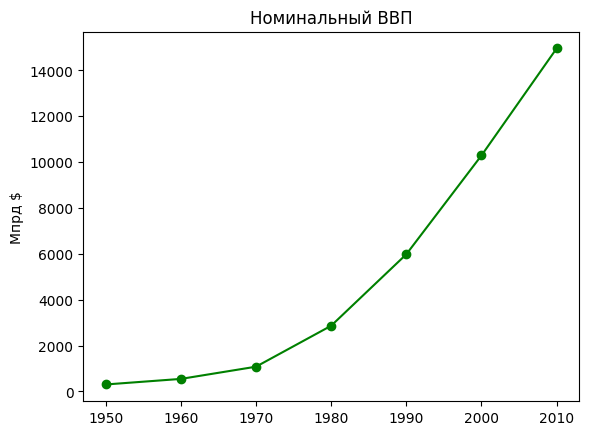

In [7]:
# Создать линейную диаграмму: годы по оси х, ВВП по оси у 
plt.plot(years, gdp, color='green', marker='o', linestyle='solid') 
# Добавить название диаграммы 
plt.title("Номинальный ВВП") 
# Добавить подпись к оси у 
plt.ylabel("Мпpд $") 
plt.show()

<br>
<font size=5>Столбчатые графики bar</font>
<br>
<br>


<br>
<b>Столбчатые графики</b> следует использовать, когда мы хотим показать как какая-нибудь величина <br>
<em>варьируется среди дискретных множеств</em>. То есть хотим увидеть не тенденцию, а просто зависимость.
<br>
<br>

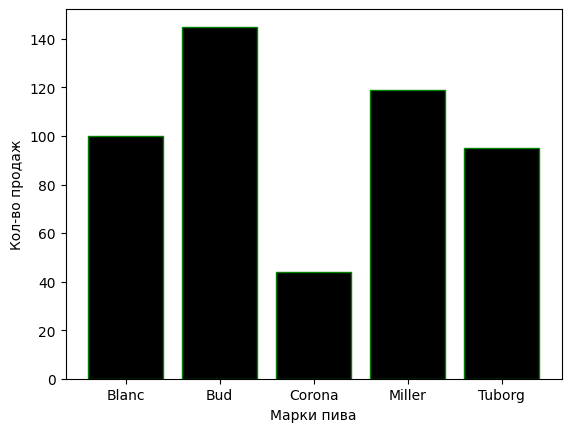

In [64]:
# Например, сколько было продано бутылок пива за месяц.

beers = ['Blanc', 'Bud', 'Corona', 'Miller', 'Tuborg']
sales = [100, 145, 44, 119, 95]

plt.bar(beers, sales, color='black', edgecolor='green')
plt.xlabel('Марки пива')
plt.ylabel('Кол-во продаж')
plt.show()


<br>
<b>Столбчатый график</b> также является хорошим вариантом выбора для построения гистрограмм сгруппированных <br>
числовых значений с целью визуального разведывания характера распределения значений.<br>
Иными словами, хотим посмотреть на какие группы можно разбить числовые значения.<br>
<br>

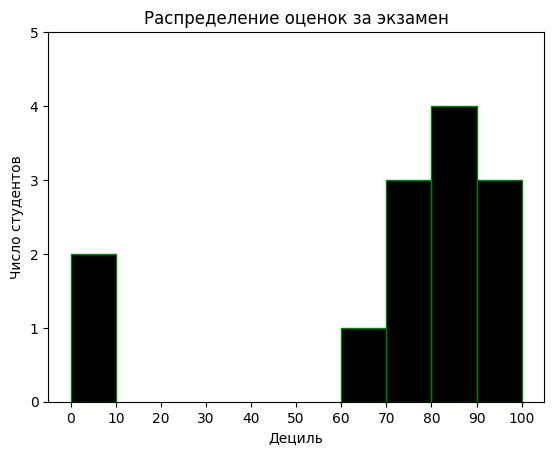

In [68]:
from collections import Counter


grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# Сгруппировать оценки подецильно, но
# разместить оценки 90 и выше вместе
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)
plt.bar([x + 5 for x in histogram.keys()], list(histogram.values()), 10, color='black', edgecolor='green') # Ширина каждого столбца 10
plt.axis([-5, 105, 0, 5]) # Оси x от -5 до 105, y от 0 до 5
plt.xticks([10 * i for i in range(11)])
plt.xlabel("Дециль")
plt.ylabel('Число студентов')
plt.title('Распределение оценок за экзамен')
plt.show()

<br>
<b>Дециль</b> - это количественный метод разделения набора ранжированных данных на 10 одинаково больших подразделов. Этот тип ранжирования данных выполняется в рамках многих академических и статистических исследований в области финансов и экономики. Данные могут быть ранжированы от наибольшего к наименьшему значению или наоборот.
<br>
<br>

<br>
<font size=5>Диаграмма рассеяния scatter</font>
<br>
<br>

<br>
<b>Scatter</b> тоже относится к группе графиков, которые показывают зависимость.<br>
Такая диаграмма подходит для визуализации связи между двумя сдвоенными множествами данных.<br>
Например, мы хотим увидеть связь между кол-вом выпитого кофе(в кружках) и минутами без сна.<br>
<br>

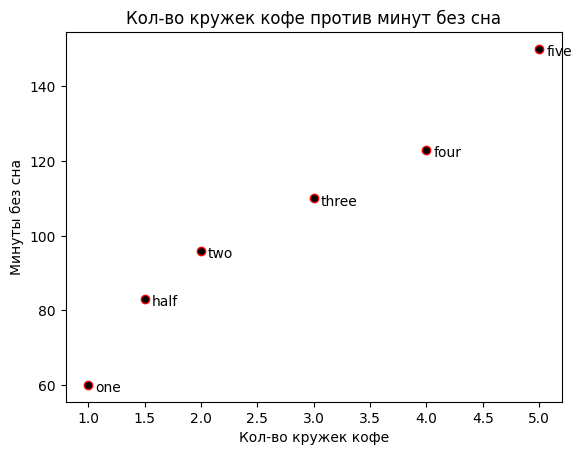

In [96]:
coffe = [1, 5, 3, 1.5, 2, 4] # Кружки кофе
minutes = [60, 150, 110, 83, 96, 123] # Минуты без чувства сна
labels = ['one', 'five', 'three', 'half', 'two', 'four']

plt.scatter(coffe, minutes, color='black', edgecolor='red')

# Назначим метку для каждой точки
for label, coffe_count, minute_count in zip(labels, coffe, minutes):
    plt.annotate(label,
                 xy=(coffe_count, minute_count), # Задать метку
                 xytext=(5, -5),                 # и немного сместить её
                 textcoords='offset points')   
plt.title('Кол-во кружек кофе против минут без сна')
plt.xlabel('Кол-во кружек кофе')                               
plt.ylabel('Минуты без сна')
plt.show()

<br>
<font size=3>Есть крутая картинка от Kaggle, которая показывает какой нужно выбирать график<font>
<br>
<br>

<img src='data/choosing.png' width="900"></img>

<font size=6>Парадоксы в данных, и почему визуализация бывает необходима</font>

<a href='https://habr.com/ru/articles/804441/'>Статья</a>

<Figure size 200x100 with 0 Axes>

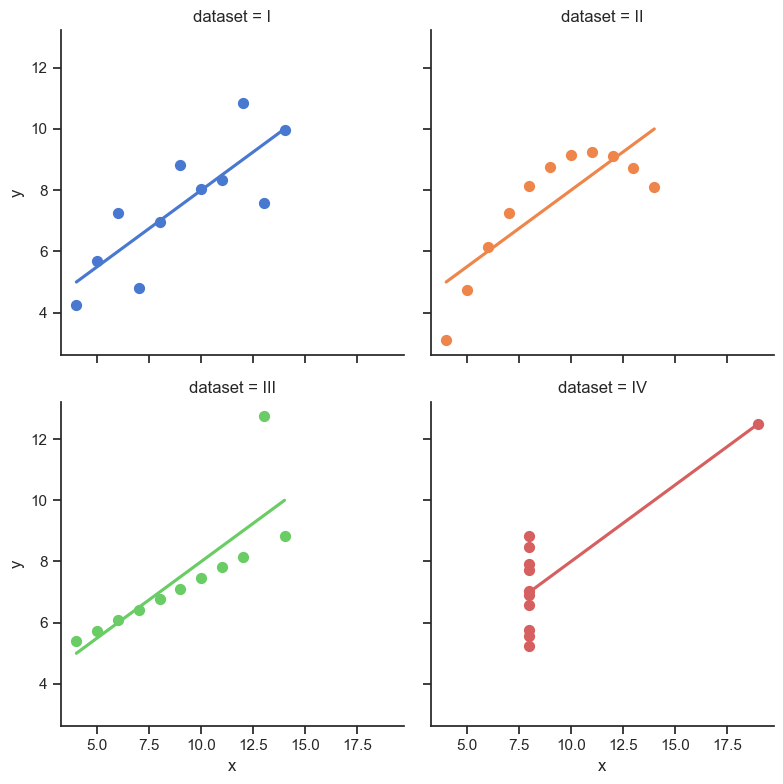

In [23]:
import seaborn as sns


plt.figure(figsize=(2, 1))
sns.set_theme(style='ticks')
df = sns.load_dataset("anscombe")

sns.lmplot(
    data=df, x='x', y='y', col='dataset', hue='dataset',
    col_wrap=2, palette='muted', ci=None,
    height=4, scatter_kws={'s': 50, 'alpha': 1}
)
plt.show()

Посмотрим на основные характеристики каждой выборки

Среднее значение

In [48]:
print(df.query('dataset == "I"').iloc[:, 1:].mean())
print(df.query('dataset == "II"').iloc[:, 1:].mean())
print(df.query('dataset == "III"').iloc[:, 1:].mean())
print(df.query('dataset == "IV"').iloc[:, 1:].mean())

x    9.000000
y    7.500909
dtype: float64
x    9.000000
y    7.500909
dtype: float64
x    9.0
y    7.5
dtype: float64
x    9.000000
y    7.500909
dtype: float64


Стандартное отклонение

In [51]:
print(df.query('dataset == "I"').iloc[:, 1:].std())
print(df.query('dataset == "II"').iloc[:, 1:].std())
print(df.query('dataset == "III"').iloc[:, 1:].std())
print(df.query('dataset == "IV"').iloc[:, 1:].std())

x    3.316625
y    2.031568
dtype: float64
x    3.316625
y    2.031657
dtype: float64
x    3.316625
y    2.030424
dtype: float64
x    3.316625
y    2.030579
dtype: float64


Коэффициент корреляции

In [70]:
def corr_plot(data, title):
    sns.heatmap(data.corr(), annot=True, square=True).set_title(title)

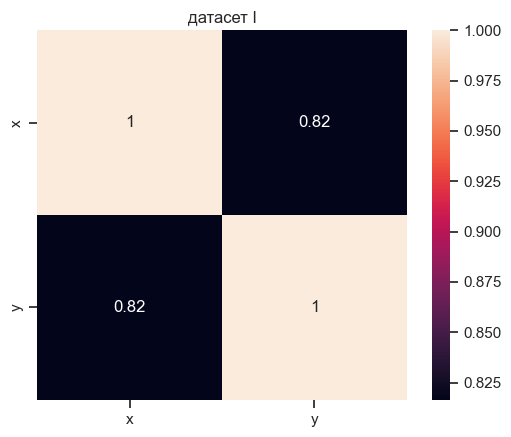

In [72]:
corr_plot(data=df.query('dataset == "I"').iloc[:, 1:], title='датасет I')

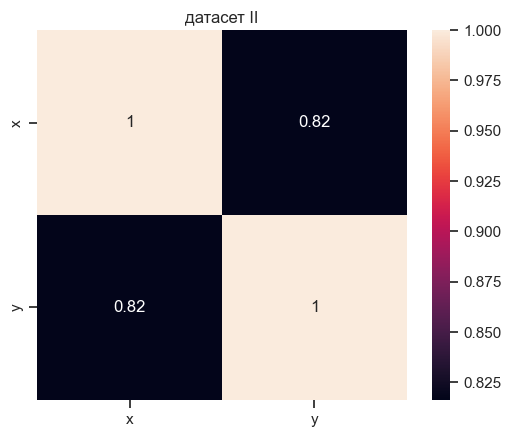

In [73]:
corr_plot(data=df.query('dataset == "II"').iloc[:, 1:], title='датасет II')

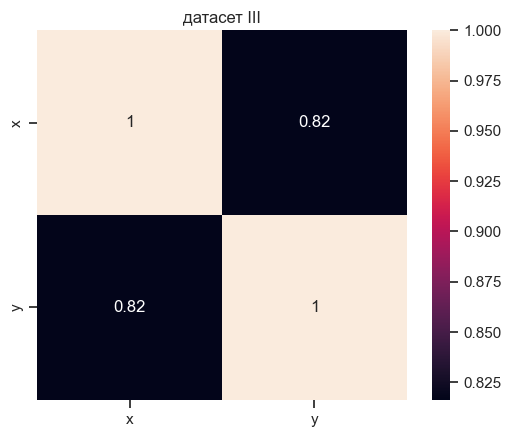

In [74]:
corr_plot(data=df.query('dataset == "III"').iloc[:, 1:], title='датасет III')

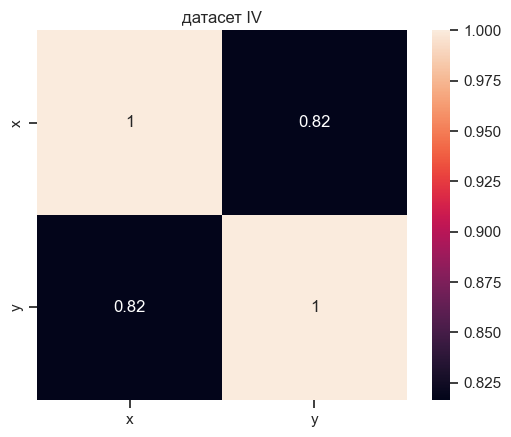

In [75]:
corr_plot(data=df.query('dataset == "IV"').iloc[:, 1:], title='датасет IV')

Прямая линейной регрессии y = kx + b

In [80]:
k1, b1 = np.polyfit(df.query('dataset == "I"').loc[:, 'x'], df.query('dataset == "I"').loc[:, 'y'], 1)
k2, b2 = np.polyfit(df.query('dataset == "II"').loc[:, 'x'], df.query('dataset == "II"').loc[:, 'y'], 1)
k3, b3 = np.polyfit(df.query('dataset == "III"').loc[:, 'x'], df.query('dataset == "III"').loc[:, 'y'], 1)
k4, b4 = np.polyfit(df.query('dataset == "IV"').loc[:, 'x'], df.query('dataset == "IV"').loc[:, 'y'], 1)

k1, k2, k3, k4, b1, b2, b3, b4

(0.5000909090909094,
 0.5000000000000006,
 0.49972727272727313,
 0.49990909090909097,
 3.000090909090908,
 3.0009090909090883,
 3.0024545454545453,
 3.0017272727272717)

In [93]:
df = pd.read_csv('data\dino.csv')
df

,X,Y
0,27.4359,42.6202
1,30.0000,42.6202
2,25.1282,45.3125
3,24.1026,49.1587
4,24.3590,53.0048
...,...,...
95,44.1026,63.7740
96,42.5641,64.1587
97,27.6923,51.8510
98,27.6923,49.5433


<Axes: xlabel='X', ylabel='Y'>

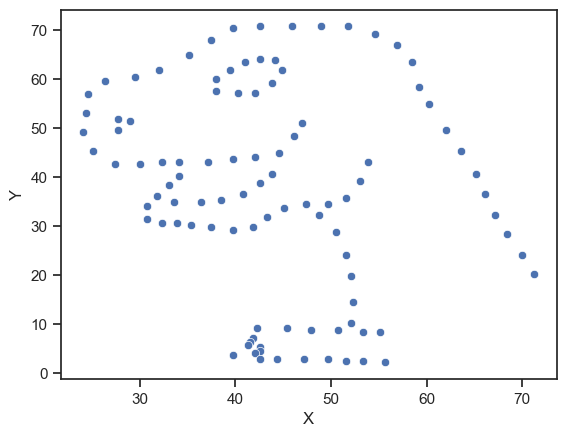

In [94]:
sns.scatterplot(data=df, x='X', y='Y')